# *Credit Card Fraud Detection*

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/fraudTrain.csv')

fraud_counts = df['is_fraud'].value_counts()

print("Fraudulent Transactions:")
print(fraud_counts)

balance_ratio = fraud_counts[1] / fraud_counts[0]
print("Balance Ratio:", balance_ratio)

Fraudulent Transactions:
0    1289169
1       7506
Name: is_fraud, dtype: int64
Balance Ratio: 0.005822355331224998


In [ ]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


*Creating Dummy Variables*

In [ ]:
import pandas as pd

df.dropna(inplace=True)
df = pd.get_dummies(df, columns=['merchant', 'category', 'gender'])

columns_to_drop = ['trans_date_trans_time','Unnamed: 0', 'street', 'first', 'last', 'dob', 'trans_num','city','state','job']
df.drop(columns=columns_to_drop, inplace=True)

print(df.head())

             cc_num     amt    zip      lat      long  city_pop   unix_time  \
0  2703186189652095    4.97  28654  36.0788  -81.1781      3495  1325376018   
1      630423337322  107.23  99160  48.8878 -118.2105       149  1325376044   
2    38859492057661  220.11  83252  42.1808 -112.2620      4154  1325376051   
3  3534093764340240   45.00  59632  46.2306 -112.1138      1939  1325376076   
4   375534208663984   41.96  24433  38.4207  -79.4629        99  1325376186   

   merch_lat  merch_long  is_fraud  ...  category_home  category_kids_pets  \
0  36.011293  -82.048315         0  ...              0                   0   
1  49.159047 -118.186462         0  ...              0                   0   
2  43.150704 -112.154481         0  ...              0                   0   
3  47.034331 -112.561071         0  ...              0                   0   
4  38.674999  -78.632459         0  ...              0                   0   

   category_misc_net  category_misc_pos  category_person

*Undersampling*

*Since we have a very huge amount of data we do undersampling*

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
import pandas as pd

X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [ ]:
from collections import Counter

original_class_counts = Counter(y_train)
undersampled_class_counts = Counter(y_train_rus)

print("Original Class Counts:", original_class_counts)
print("Undersampled Class Counts:", undersampled_class_counts)

Original Class Counts: Counter({0: 1031354, 1: 5986})
Undersampled Class Counts: Counter({0: 5986, 1: 5986})


*Model Training*

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

rf_classifier = RandomForestClassifier(random_state=42)

rf_classifier.fit(X_train_rus, y_train_rus)

y_pred = rf_classifier.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9732816627142499

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99    257815
           1       0.17      0.93      0.29      1520

    accuracy                           0.97    259335
   macro avg       0.59      0.95      0.64    259335
weighted avg       0.99      0.97      0.98    259335



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

gb_classifier = GradientBoostingClassifier(random_state=42)

gb_classifier.fit(X_train_rus, y_train_rus)

y_probs_gb = gb_classifier.predict_proba(X_test)

thresholds_gb = np.arange(0.1, 1.0, 0.05)
f1_scores_gb = []

for threshold in thresholds_gb:
    y_pred_adjusted_gb = (y_probs_gb[:, 1] > threshold).astype(int)
    f1_scores_gb.append(f1_score(y_test, y_pred_adjusted_gb, average='macro'))

best_threshold_gb = thresholds_gb[np.argmax(f1_scores_gb)]

y_pred_adjusted_gb = (y_probs_gb[:, 1] > best_threshold_gb).astype(int)

print("Best Threshold for Gradient Boosting:", best_threshold_gb)
print("Classification Report with Best Threshold for Gradient Boosting:\n", classification_report(y_test, y_pred_adjusted_gb))
print("Accuracy with Best Threshold for Gradient Boosting:", accuracy_score(y_test, y_pred_adjusted_gb))


Best Threshold for Gradient Boosting: 0.9500000000000003
Classification Report with Best Threshold for Gradient Boosting:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.53      0.74      0.62      1520

    accuracy                           0.99    259335
   macro avg       0.77      0.87      0.81    259335
weighted avg       1.00      0.99      1.00    259335

Accuracy with Best Threshold for Gradient Boosting: 0.9946979775194247


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1_macro')

grid_search.fit(X_train_rus, y_train_rus)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

y_pred_best = best_model.predict(X_test)
print("Classification Report with Best Model:\n", classification_report(y_test, y_pred_best))
print("Accuracy with Best Model:", accuracy_score(y_test, y_pred_best))


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Classification Report with Best Model:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99    257815
           1       0.18      0.93      0.30      1520

    accuracy                           0.97    259335
   macro avg       0.59      0.95      0.64    259335
weighted avg       0.99      0.97      0.98    259335

Accuracy with Best Model: 0.9746119883548306


*Confusion Matrix*

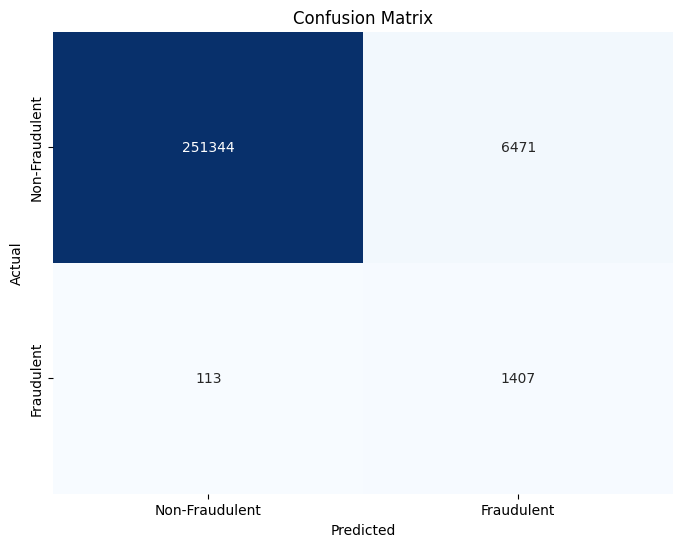

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

conf_mat = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Fraudulent', 'Fraudulent'],
            yticklabels=['Non-Fraudulent', 'Fraudulent'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

*ROC-Curve*

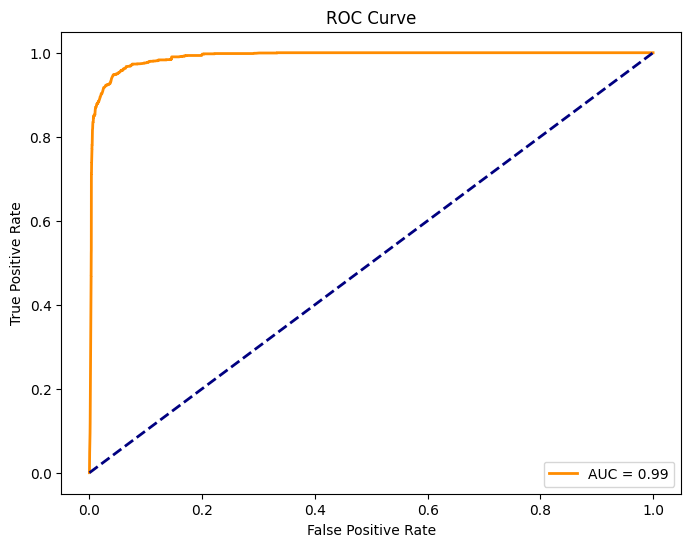

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_probs_gb[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()